In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generate_random_binary_text(size):
    """Generate a random binary string of a given size."""
    return ''.join(random.choice('01') for _ in range(size))

In [3]:
def calculate_harmonics(text):
    """Calculate harmonics for a given binary text."""
    text_check = [(char, False) for char in text]
    harmonics = {}
    n = len(text)

    for i in range(n):
        if text_check[i][0] == "1" and not text_check[i][1]:
            for step in range(1, n):
                if all(text[j] == "1" for j in range(i % step, n, step)):
                    for idx in range(i % step, n, step):
                        text_check[idx] = (text_check[idx][0], True)
                    harmonics.setdefault(i % step, set()).add(step)
                    break
            else:
                text_check[i] = (text_check[i][0], True)
                harmonics.setdefault(i, set()).add(n - i)

    total_harmonics = sum(len(steps) for steps in harmonics.values())
    return total_harmonics

## Анализ эффективности алгоритма на случайных данных в разных масштабах.

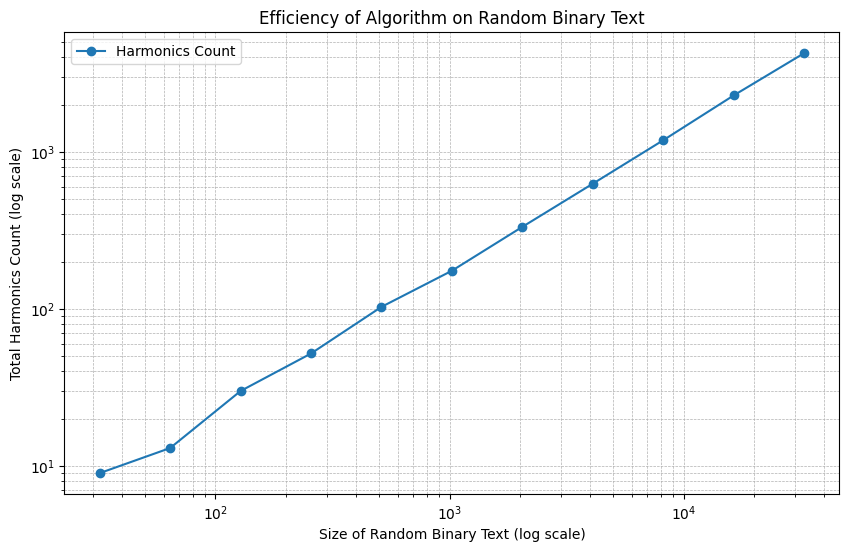

In [4]:
def analyze_compression_efficiency():
    """Analyze the efficiency of the algorithm for compressing random data on large scales."""
    sizes = [2**i for i in range(5, 16)]  # Text sizes in powers of 2 (32 to 32768)
    harmonic_counts = []

    for size in sizes:
        text = generate_random_binary_text(size)
        total_harmonics = calculate_harmonics(text)
        harmonic_counts.append(total_harmonics)

    plt.figure(figsize=(10, 6))
    plt.plot(sizes, harmonic_counts, marker='o', label='Harmonics Count')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Size of Random Binary Text (log scale)')
    plt.ylabel('Total Harmonics Count (log scale)')
    plt.title('Efficiency of Algorithm on Random Binary Text')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

analyze_compression_efficiency()

## Анализ корреляцию между числом гармоник и частотой единиц в двоичном тексте

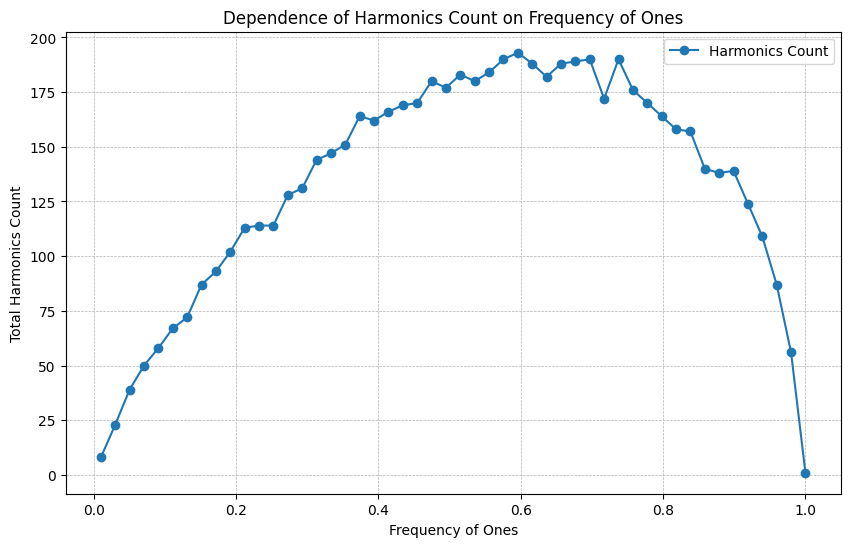

In [5]:
def analyze_harmonics_vs_frequency():
    """Analyze the correlation between the number of harmonics and the frequency of ones in binary text."""
    size = 1024  # Fixed size of binary text
    frequencies = np.linspace(0.01, 1.0, 50)  # Range of frequencies from 1% to 100%
    harmonic_counts = []

    for freq in frequencies:
        num_ones = int(size * freq)
        text = '1' * num_ones + '0' * (size - num_ones)
        text = ''.join(random.sample(text, len(text)))  # Shuffle the text
        total_harmonics = calculate_harmonics(text)
        harmonic_counts.append(total_harmonics)

    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, harmonic_counts, marker='o', label='Harmonics Count')
    plt.xlabel('Frequency of Ones')
    plt.ylabel('Total Harmonics Count')
    plt.title('Dependence of Harmonics Count on Frequency of Ones')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

analyze_harmonics_vs_frequency()